# CLIMATE CHANGE: EARTH TEMPERATURE

### 1. Read Data From CSV file

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import zipfile

Read csv data and parse "dt" as pandas timestamps type data.

In [2]:
zf = zipfile.ZipFile('../data/raw/GlobalLandTemperaturesByMajorCity.csv.zip')
df = pd.read_csv(zf.open('GlobalLandTemperaturesByMajorCity.csv'),parse_dates= ["dt"])
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [3]:
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E
239176,2013-09-01,NaN,NaN,Xian,China,34.56N,108.97E


In [4]:
type(df.dt[0])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
# Rename column "dt" to "Date" and set the column as it's index. 
df.rename(columns = {'dt':'Date'}, inplace=True)
df.set_index(['Date'], inplace=True)
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
Date,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


### 2. Get General Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239177 entries, 1849-01-01 to 2013-09-01
Data columns (total 6 columns):
AverageTemperature               228175 non-null float64
AverageTemperatureUncertainty    228175 non-null float64
City                             239177 non-null object
Country                          239177 non-null object
Latitude                         239177 non-null object
Longitude                        239177 non-null object
dtypes: float64(2), object(4)
memory usage: 12.8+ MB


In [7]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [8]:
df.City.describe()

count       239177
unique         100
top       Istanbul
freq          3239
Name: City, dtype: object

In [9]:
df.Country.describe()

count     239177
unique        49
top        India
freq       36582
Name: Country, dtype: object

### 3. Change Latitude and Longitude Format

In [10]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
Date,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [11]:
df.tail()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
Date,,,,,,
2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E
2013-09-01,NaN,NaN,Xian,China,34.56N,108.97E


In [12]:
type(df.Latitude['1849-01-01'][0])

str

In [13]:
df["Latitude"]  = df.Latitude.map(lambda x : float(str(x)[:-1]) if x[-1]=="N" else -float(str(x)[:-1]))
df["Longitude"] = df.Longitude.map(lambda x : float(str(x)[:-1]) if x[-1]=="E" else -float(str(x)[:-1]))

Notes:
(-) is used to replace North and East from latitude and longitude, so in the future work it can be visualized on the map

In [14]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
Date,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23


### 4. Deal With Missing Data

In [15]:
df.isnull().sum()

AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [16]:
# Creating a new column indicating if we have a null value in the Avg_temp column (1) or not (0)
df['temp_data'] = df['AverageTemperature'].apply(lambda x: 1 if not pd.isnull(x) else 0)
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,temp_data
Date,,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1


In [17]:
# Verifying all null values have 0 
df['temp_data'].value_counts()

1    228175
0     11002
Name: temp_data, dtype: int64

In [18]:
# Null values by country
df['temp_data'].groupby(df['Country']).value_counts()

Country                             temp_data
Afghanistan                         1             2121
                                    0               48
Angola                              1             1735
                                    0              158
Australia                           1             4138
                                    0                8
Bangladesh                          1             2532
                                    0               81
Brazil                              1            12139
                                    0              791
Burma                               1             2532
                                    0               81
Canada                              1             6282
                                    0              196
Chile                               1             1900
                                    0                1
China                               1            34952
                   

In [19]:
# Extract just the year and month from the date column and create it's own column.
df['Year'] = df.index.year
df['Month'] = df.index.month
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,temp_data,Year,Month
Date,,,,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,1
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,2
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,3
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,4
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,5


In [20]:
# Reviewing if there's null values in the last years of the data grouped by Year
df['temp_data'].groupby(df.index.year).value_counts().tail(150)

Date  temp_data
1878  0              12
1879  1            1125
      0              63
1880  1            1170
      0              18
1881  1            1172
      0              26
1882  1            1173
      0              27
1883  1            1174
      0              26
1884  1            1159
      0              41
1885  1            1125
      0              75
1886  1            1174
      0              26
1887  1            1176
      0              24
1888  1            1176
      0              24
1889  1            1188
      0              12
1890  1            1187
      0              13
1891  1            1200
1892  1            1200
1893  1            1200
1894  1            1200
1895  1            1200
                   ... 
1985  1            1200
1986  1            1200
1987  1            1200
1988  1            1200
1989  1            1200
1990  1            1200
1991  1            1200
1992  1            1200
1993  1            1200
1994  1            1200


In [21]:
# Check missing data
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
AverageTemperature,11002,0.045999
AverageTemperatureUncertainty,11002,0.045999
City,0,0.000000
Country,0,0.000000
Latitude,0,0.000000
Longitude,0,0.000000
temp_data,0,0.000000
Year,0,0.000000
Month,0,0.000000


### 5. Describe Temperature by City and Country

In [22]:
df_city = df.groupby(['City'])

In [23]:
df_city.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,temp_data,Year,Month
Date,,,,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,1
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,2
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,3
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,4
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,5
1850-01-01,15.986,1.537,Addis Abeba,Ethiopia,8.84,38.11,1,1850,1
1850-02-01,18.345,1.527,Addis Abeba,Ethiopia,8.84,38.11,1,1850,2
1850-03-01,18.632,2.162,Addis Abeba,Ethiopia,8.84,38.11,1,1850,3
1850-04-01,18.154,1.693,Addis Abeba,Ethiopia,8.84,38.11,1,1850,4


In [24]:
df_city.describe()

AverageTemperature                                          \
                              count       mean        std     min       25%   
City                                                                          
Abidjan                      1777.0  26.163737   1.403715  22.363  25.11400   
Addis Abeba                  1679.0  17.525073   1.223339  14.528  16.56900   
Ahmadabad                    2448.0  26.529853   4.260933  16.792  22.92325   
Aleppo                       2479.0  17.370587   8.536599   0.670   9.26050   
Alexandria                   2666.0  20.312617   4.559545  10.227  15.98725   
Ankara                       2945.0  10.392117   8.134544  -6.280   3.07000   
Baghdad                      2320.0  22.614346   9.197444   4.236  14.00925   
Bangalore                    2508.0  24.855896   1.866839  20.257  23.51125   
Bangkok                      2246.0  27.164733   1.711223  21.894  26.12225   
Belo Horizonte               2096.0  21.071396   1.939279  15.920  19.59900   
Berlin                       3166.0   8.916234   7.255932 -10.125   2.66250   
Bogotá                       2018.0  20.002265   0.725750  17.932  19.52250   
Bombay                       2508.0  26.631452   1.608891  21.010  25.50500   
Brasília                     2096.0  21.727595   1.293388  17.208  20.98075   
Cairo                        2442.0  21.221259   5.588877   9.137  15.84250   
Calcutta                     2532.0  26.042152   4.228285  15.253  22.40625   
Cali                         1985.0  21.797027   0.714587  19.808  21.32300   
Cape Town                    1873.0  16.079080   2.993647   9.997  13.32500   
Casablanca                   2914.0  17.184158   5.674712   6.011  12.27050   
Changchun                    2316.0   4.923798  14.134372 -23.272  -8.01800   
Chengdu                      2183.0  10.638042   6.874222  -2.429   4.58800   
Chicago                      3141.0  10.070644   8.400333  -8.590   2.64300   
Chongqing                    2083.0  16.844962   7.372323   3.354  10.30450   
Dakar                        1872.0  24.627520   2.917713  18.768  21.88375   
Dalian                       2135.0  10.229077  10.263341  -9.348   0.36650   
Dar Es Salaam                1586.0  25.744672   1.579105  22.371  24.31725   
Delhi                        2394.0  25.165861   6.764657  11.378  19.05800   
Dhaka                        2532.0  25.490568   3.882553  15.148  22.35550   
Durban                       1873.0  20.351292   1.967289  15.507  18.61200   
Faisalabad                   2083.0  24.138397   7.738961   9.343  17.10500   
...                             ...        ...        ...     ...       ...   
New Delhi                    2394.0  25.165861   6.764657  11.378  19.05800   
New York                     3119.0   9.523296   9.250677  -9.162   1.03700   
Paris                        3166.0  10.402644   5.904355  -3.876   5.31600   
Peking                       2304.0  11.809383  11.147759  -8.579   1.46450   
Pune                         2508.0  24.644615   3.005405  17.598  22.43250   
Rangoon                      2532.0  26.735193   1.874158  20.854  25.60750   
Rio De Janeiro               2096.0  23.788916   1.852818  18.483  22.32525   
Riyadh                       2008.0  25.263330   7.885213  10.496  18.14000   
Rome                         3166.0  11.965502   6.846291  -2.598   5.75825   
Saint Petersburg             3166.0   3.918045   8.911517 -18.644  -3.48300   
Salvador                     2096.0  24.656971   1.340428  21.005  23.60300   
Santiago                     1900.0   5.692277   4.746191  -3.816   1.35450   
Santo Domingo                2207.0  25.976777   1.319187  22.224  24.92000   
Seoul                        2096.0  10.681885   9.875383  -8.992   1.37850   
Shanghai                     2072.0  15.969512   8.739713  -0.050   7.74175   
Shenyang                     2199.0   7.214980  12.351453 -17.035  -3.87150   
Singapore                    2052.0  26.523103   0.742396  24.032  

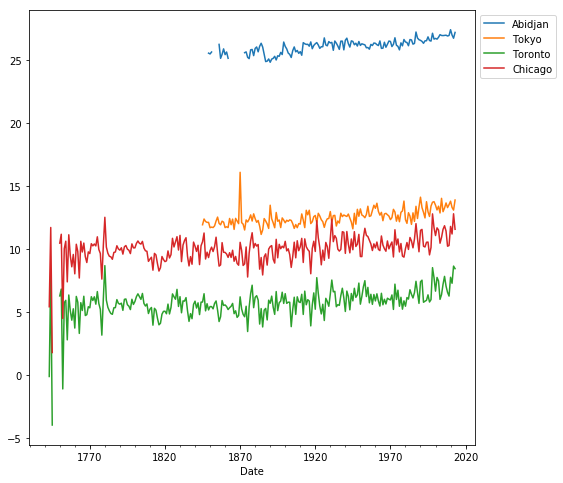

In [25]:
#Visualize some city
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
df_city.get_group('Abidjan').AverageTemperature.resample('Y').mean().plot(label='Abidjan')
df_city.get_group('Tokyo').AverageTemperature.resample('Y').mean().plot(label='Tokyo')
df_city.get_group('Toronto').AverageTemperature.resample('Y').mean().plot(label='Toronto')
df_city.get_group('Chicago').AverageTemperature.resample('Y').mean().plot(label='Chicago')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));


In [26]:
df_country = df.groupby(['Country'])

In [27]:
df_country.describe()

AverageTemperature                        \
                                                count       mean        std   
Country                                                                       
Afghanistan                                    2121.0  14.342919   8.653165   
Angola                                         1735.0  23.693046   1.975949   
Australia                                      4138.0  15.190055   3.699567   
Bangladesh                                     2532.0  25.490568   3.882553   
Brazil                                        12139.0  22.847555   2.945894   
Burma                                          2532.0  26.735193   1.874158   
Canada                                         6282.0   5.109462  10.680999   
Chile                                          1900.0   5.692277   4.746191   
China                                         34952.0  11.793666  11.380202   
Colombia                                       4003.0  20.892248   1.150674   
Congo (Democratic Republic Of The)             1735.0  23.866441   1.152296   
Côte D'Ivoire                                  1777.0  26.163737   1.403715   
Dominican Republic                             2207.0  25.976777   1.319187   
Egypt                                          7550.0  20.900406   5.265752   
Ethiopia                                       1679.0  17.525073   1.223339   
France                                         3166.0  10.402644   5.904355   
Germany                                        3166.0   8.916234   7.255932   
India                                         34627.0  25.809309   4.851196   
Indonesia                                      3758.0  26.659057   0.702243   
Iran                                           2155.0  12.571992   8.771678   
Iraq                                           2320.0  22.614346   9.197444   
Italy                                          3166.0  11.965502   6.846291   
Japan                                          4050.0  13.658247   8.153847   
Kenya                                          1678.0  16.081395   1.051539   
Mexico                                         2145.0  15.717422   2.285342   
Morocco                                        2914.0  17.184158   5.674712   
Nigeria                                        5200.0  26.361323   2.028935   
Pakistan                                       6490.0  24.811197   6.889075   
Peru                                           1521.0  16.769120   2.731314   
Philippines                                    2021.0  26.448334   1.317867   
Russia                                         6332.0   3.958878   9.618553   
Saudi Arabia                                   3856.0  26.427309   6.252432   
Senegal                                        1872.0  24.627520   2.917713   
Singapore                                      2052.0  26.523103   0.742396   
Somalia                                        1679.0  27.151964   1.034807   
South Africa                                   3746.0  18.215186   3.313387   
South Korea                                    2096.0  10.681885   9.875383   
Spain                                          3166.0  11.448704   6.561506   
Sudan                                          1768.0  29.081291   3.747367   
Syria                                          2479.0  17.370587   8.536599   
Taiwan                                         2071.0  22.212441   4.159083   
Tanzania                                       1586.0  25.744672   1.579105   
Thailand                                       2246.0  27.164733   1.711223   
Turkey                                         9239.0  13.790998   7.431409   
Ukraine                                        3166.0   7.041033   9.770855   
United Kingdom                                 3166.0   9.459038   5.154545   
United States                                  8237.0  11.257246   8.558551   
Vietnam                                        2069.0  27.193984   1.192461   
Zimbab

Text(0,0.5,'Average Temperature °C')

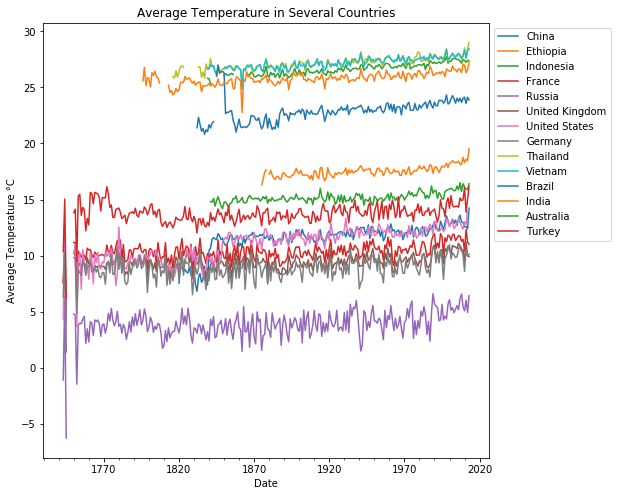

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
df_country = df.groupby(['Country'])
df_country.get_group('China').AverageTemperature.resample('Y').mean().plot(label='China')
df_country.get_group('Ethiopia').AverageTemperature.resample('Y').mean().plot(label='Ethiopia')
df_country.get_group('Indonesia').AverageTemperature.resample('Y').mean().plot(label='Indonesia')
df_country.get_group('France').AverageTemperature.resample('Y').mean().plot(label='France')
df_country.get_group('Russia').AverageTemperature.resample('Y').mean().plot(label='Russia')
df_country.get_group('United Kingdom').AverageTemperature.resample('Y').mean().plot(label='United Kingdom')
df_country.get_group('United States').AverageTemperature.resample('Y').mean().plot(label='United States')
df_country.get_group('Germany').AverageTemperature.resample('Y').mean().plot(label='Germany')
df_country.get_group('Thailand').AverageTemperature.resample('Y').mean().plot(label='Thailand')
df_country.get_group('Vietnam').AverageTemperature.resample('Y').mean().plot(label='Vietnam')
df_country.get_group('Brazil').AverageTemperature.resample('Y').mean().plot(label='Brazil')
df_country.get_group('India').AverageTemperature.resample('Y').mean().plot(label='India')
df_country.get_group('Australia').AverageTemperature.resample('Y').mean().plot(label='Australia')
df_country.get_group('Turkey').AverageTemperature.resample('Y').mean().plot(label='Turkey')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));
plt.title('Average Temperature in Several Countries')
plt.ylabel('Average Temperature °C')

Notes:
1. There are many missing data on Average Temperature and Average Temperature Uncertainty
2. Every City and Country has different counts of missing value
3. Missing data is found before 1891

In [29]:
# Filtering by years 1980-2013 because these didn't have many null values
new_df = df.loc['1890':'2013']
new_df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,temp_data,Year,Month
Date,,,,,,,,,
1890-01-01,25.965,2.000,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1890,1
1890-02-01,26.912,1.273,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1890,2
1890-03-01,26.442,2.005,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1890,3
1890-04-01,25.694,1.622,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1890,4
1890-05-01,25.011,1.659,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1890,5


In [30]:
#  Statistical information by country
new_df.groupby('Country').describe()

AverageTemperature                        \
                                                count       mean        std   
Country                                                                       
Afghanistan                                    1484.0  14.486370   8.646295   
Angola                                         1484.0  23.782569   1.984805   
Australia                                      2968.0  15.294294   3.705448   
Bangladesh                                     1484.0  25.742808   3.851785   
Brazil                                         8904.0  23.153414   2.975286   
Burma                                          1484.0  26.996654   1.829298   
Canada                                         2970.0   5.583311  10.636060   
Chile                                          1484.0   5.848447   4.752427   
China                                         23744.0  12.161975  11.281622   
Colombia                                       2968.0  21.039093   1.130689   
Congo (Democratic Republic Of The)             1484.0  23.959832   1.144487   
Côte D'Ivoire                                  1484.0  26.280049   1.392129   
Dominican Republic                             1485.0  26.156457   1.289609   
Egypt                                          4452.0  21.186318   5.274948   
Ethiopia                                       1484.0  17.585689   1.218564   
France                                         1484.0  10.643902   5.781262   
Germany                                        1484.0   9.189047   7.090250   
India                                         20776.0  26.045715   4.872686   
Indonesia                                      2968.0  26.792565   0.673286   
Iran                                           1484.0  12.779594   8.772494   
Iraq                                           1484.0  22.853832   9.223378   
Italy                                          1484.0  12.196293   6.748744   
Japan                                          2968.0  13.816152   8.123136   
Kenya                                          1484.0  16.148984   1.051418   
Mexico                                         1485.0  15.908040   2.244188   
Morocco                                        1484.0  17.379283   5.693737   
Nigeria                                        4452.0  26.457764   2.027258   
Pakistan                                       4452.0  24.940104   6.978911   
Peru                                           1470.0  16.797136   2.734706   
Philippines                                    1484.0  26.606102   1.278052   
Russia                                         2968.0   4.314286   9.508214   
Saudi Arabia                                   2968.0  26.623248   6.156333   
Senegal                                        1484.0  24.750007   2.890301   
Singapore                                      1484.0  26.703518   0.672142   
Somalia                                        1484.0  27.213629   1.031217   
South Africa                                   2968.0  18.322694   3.327617   
South Korea                                    1484.0  10.884582   9.846183   
Spain                                          1484.0  11.662493   6.548822   
Sudan                                          1484.0  29.182781   3.742162   
Syria                                          1484.0  17.641778   8.549464   
Taiwan                                         1484.0  22.381860   4.131360   
Tanzania                                       1483.0  25.777704   1.579811   
Thailand                                       1484.0  27.398298   1.666741   
Turkey                                         4452.0  13.980107   7.410197   
Ukraine                                        1484.0   7.329802   9.688466   
United Kingdom                                 1484.0   9.705291   5.005978   
United States                                  4455.0  12.113109   8.271664   
Vietnam                                        1484.0  27.369706   1.151536   
Zimbab

In [31]:
# Shows the average temperature by country in descending order
new_df[['Country','AverageTemperature']].groupby(['Country']).mean().sort_values('AverageTemperature',ascending=False)

,AverageTemperature
Country,
Sudan,29.182781
Thailand,27.398298
Vietnam,27.369706
Somalia,27.213629
Burma,26.996654
Indonesia,26.792565
Singapore,26.703518
Saudi Arabia,26.623248
Philippines,26.606102


Text(0,0.5,'Average Temperature °C')

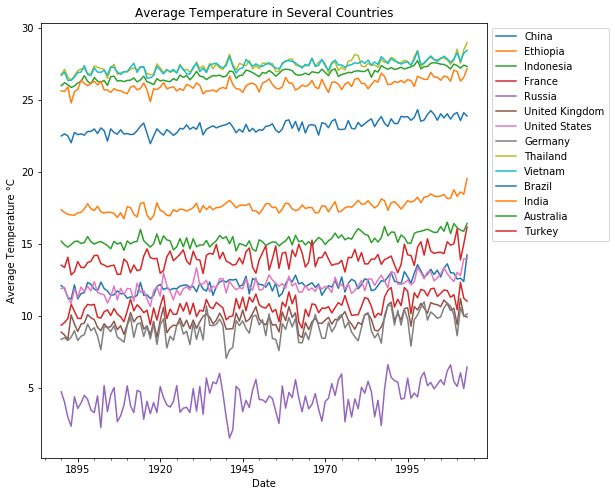

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
new_df_country = new_df.groupby(['Country'])
new_df_country.get_group('China').AverageTemperature.resample('Y').mean().plot(label='China')
new_df_country.get_group('Ethiopia').AverageTemperature.resample('Y').mean().plot(label='Ethiopia')
new_df_country.get_group('Indonesia').AverageTemperature.resample('Y').mean().plot(label='Indonesia')
new_df_country.get_group('France').AverageTemperature.resample('Y').mean().plot(label='France')
new_df_country.get_group('Russia').AverageTemperature.resample('Y').mean().plot(label='Russia')
new_df_country.get_group('United Kingdom').AverageTemperature.resample('Y').mean().plot(label='United Kingdom')
new_df_country.get_group('United States').AverageTemperature.resample('Y').mean().plot(label='United States')
new_df_country.get_group('Germany').AverageTemperature.resample('Y').mean().plot(label='Germany')
new_df_country.get_group('Thailand').AverageTemperature.resample('Y').mean().plot(label='Thailand')
new_df_country.get_group('Vietnam').AverageTemperature.resample('Y').mean().plot(label='Vietnam')
new_df_country.get_group('Brazil').AverageTemperature.resample('Y').mean().plot(label='Brazil')
new_df_country.get_group('India').AverageTemperature.resample('Y').mean().plot(label='India')
new_df_country.get_group('Australia').AverageTemperature.resample('Y').mean().plot(label='Australia')
new_df_country.get_group('Turkey').AverageTemperature.resample('Y').mean().plot(label='Turkey')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));
plt.title('Average Temperature in Several Countries')
plt.ylabel('Average Temperature °C')

In [33]:
# Check missing data
missingnew_df = pd.DataFrame(new_df.isna().sum()).rename(columns = {0: 'total'})
missingnew_df['percent'] = missingnew_df['total'] / len(new_df)
missingnew_df

,total,percent
AverageTemperature,108,0.000727
AverageTemperatureUncertainty,108,0.000727
City,0,0.000000
Country,0,0.000000
Latitude,0,0.000000
Longitude,0,0.000000
temp_data,0,0.000000
Year,0,0.000000
Month,0,0.000000


Notes:
1. After choosing year 1890 - 2013, there are still founded 108 missing value on Average Temperature and Certainty
2. Next plan to fill missing value is to fill them with mean value

In [34]:
# Replace Missing Values
pd.options.mode.chained_assignment = None  # default='warn'
new_df[new_df['AverageTemperature'].isnull() ]
new_df['AverageTemperature'] = new_df.groupby("Month").transform(lambda x: x.fillna(x.mean()))
new_df['AverageTemperatureUncertainty'] = new_df.groupby("Month").transform(lambda x: x.fillna(x.mean()))
new_df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,temp_data,Year,Month
Date,,,,,,,,,
1890-01-01,25.965,25.965,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1890,1
1890-02-01,26.912,26.912,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1890,2
1890-03-01,26.442,26.442,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1890,3
1890-04-01,25.694,25.694,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1890,4
1890-05-01,25.011,25.011,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1890,5


In [35]:
new_df.isnull().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
temp_data                        0
Year                             0
Month                            0
dtype: int64

So far data is clean and complete

### 6. Data Visualization

#### 6.1 Average temperature in countries

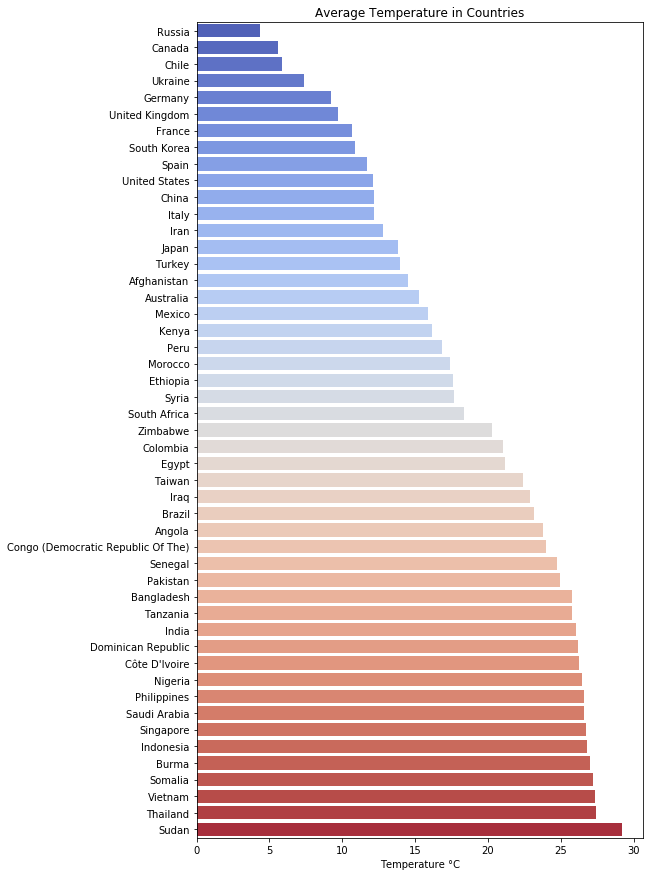

In [36]:
countries = new_df['Country'].unique()
average_temp = []

# calc mean temperature
for country in countries:
    average_temp.append(new_df[new_df['Country'] == country]['AverageTemperature'].mean())
    

res_aver_temp = []
res_countries = []

for i in range(len(average_temp)):
    if not np.isnan(average_temp[i]):
        res_aver_temp.append(average_temp[i])
        res_countries.append(countries[i])
        
# sorting
res_aver_temp, res_countries = (list(x) for x in zip(*sorted(zip(res_aver_temp, res_countries), key=lambda pair: pair[0])))

f, ax = plt.subplots(figsize=(8, 15))
sns.barplot(x=res_aver_temp, y=res_countries, palette=sns.color_palette("coolwarm", len(res_aver_temp)), ax=ax)

texts = ax.set(ylabel="", xlabel="Temperature °C", title="Average Temperature in Countries")